## PROJECT ON DIABETES PREDICTION DATASET - EXPLORATORY DATA ANALYSIS AND 
## BUILDING MODEL ::

### 1. INTRODUCTION:
### >>> EDA is the first and most important step in the preparation of data, helps to discover patterns, checking 
### missing values outliers, basically used to get the insights from the data through data visualizations and 
### therby building different models to come up with the results and comparing them to fetch the best results 
### for the data.

### 1.1 PROJECT STATEMENT :


### >> PREDICTING DIABETES IN PATIENTS BASED ON DIAGNOSTIC MEASUREMENTS AND THEREBY,
### EVALUATING THE PREDICTIVE PERFORMANCE OF DIFFERENT MACHINE LEARNING ALGORITHMS
### IN PREDICTING THE OUTCOMES AND IDENTIFYING TRENDS FOR DIABETES MANAGEMENT AND 
### EARLY PERSONALIZED TREATMENT BASED ON THE RECORDS OF THE PATIENTS IN THE DATASET.

### 1.2 DATA DICTIONARY

### >>> There are 8 features (independent variables) and 1 target (dependent variable):
### ** Pregnancies - Number of times pregnant
### ** Glucose - Plasma glucose concentration (2 hours in an oral glucose tolerance test)
### ** BloodPressure - Diastolic blood pressure (mm Hg)
### ** SkinThickness - Fold thickness of triceps skin (mm)
### ** Insulin - 2 hour serum insulin 
### ** BMI - Body Mass Index
### ** DiabetesPedigreeFunction - Diabetes pedigree function
### ** Age - Age (years)
### ** Outcome - Target (dependent) variable or class variable (0 or 1), where class (0) determines that 
### the patient is non-diabetic whereas on the otherhand class (1) determines that the patient is diabetic.

### 1.3  GOALS AND OBJECTIVES:

### >> LETS COME STRAIGHT AWAY TO SPECIFY THE GOAL BEHIND PERFORMING THIS PROBLEM.........

### >>> The goal is to draw inferences about identifying this particular disease of Diabetes in a person........

### 2. EXPLORATORY DATA ANALYSIS

### 2.1 LOADING THE REQUIRED LIBRARIES

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


### 2.2 READING THE DATA

In [2]:
df=pd.read_csv('diabetes dataset.zip')
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
769            1       93             70             31        0  30.4   
770            1      126             60              0        0  30.1   
771            1       93             70             31        0  30.4   
772            1      126             60              0        0  30.1   
773            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
769                     0.315   23        0  
770                     0.349   47        1  
771                     0.315   23        0  
772                     0.349   47        1  
773                     0.315   23        0  

[774 rows x 9 columns]

### => OVERVIEW :
###  As, we can see that some features(independent variables), contains some values mentioned as '0', so we 
### need to perform some data cleansing before feature engineering inorder to drop these kinds of records 
### from our dataframe.

### >> NOW, LETS TRY TO UNDERSTAND THIS DATA THOROUGHLY...SO THAT IT ADDS AN ADVANTAGE IN 
###    MY  DATA ANALYSIS ....

### As it is evident that spending an ample amount of time in understanding the data , actually helps in the 
### data analysis.

### 2.3 UNDERSTANDING THE DATA

### => Fetching the top 5 rows or the first five rows of the dataset

In [3]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

### => Fetching the last 5 rows of the dataset

In [4]:
df.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
769            1       93             70             31        0  30.4   
770            1      126             60              0        0  30.1   
771            1       93             70             31        0  30.4   
772            1      126             60              0        0  30.1   
773            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
769                     0.315   23        0  
770                     0.349   47        1  
771                     0.315   23        0  
772                     0.349   47        1  
773                     0.315   23        0

### => Fetching the shape and column of the dataframe

In [5]:
df.shape

(774, 9)

In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### => Checking the data type of each columns :

In [7]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### => Reviewing about the info about the dataframe

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               774 non-null    int64  
 1   Glucose                   774 non-null    int64  
 2   BloodPressure             774 non-null    int64  
 3   SkinThickness             774 non-null    int64  
 4   Insulin                   774 non-null    int64  
 5   BMI                       774 non-null    float64
 6   DiabetesPedigreeFunction  774 non-null    float64
 7   Age                       774 non-null    int64  
 8   Outcome                   774 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.5 KB


### => OVERVIEW :
### It actually helps us to gather some valuable information of the dataframe , such as the name of 
###    the each columns , their datatypes and also most importantly about the null values.

### => RENAMING THE COLUMNS :

In [9]:
df.rename(columns={"DiabetesPedigreeFunction":"DiaPedFunc","BloodPressure":"BLOP","SkinThickness":"SKNT"},inplace=True)


In [10]:
df

Pregnancies  Glucose  BLOP  SKNT  Insulin   BMI  DiaPedFunc  Age  Outcome
0              6      148    72    35        0  33.6       0.627   50        1
1              1       85    66    29        0  26.6       0.351   31        0
2              8      183    64     0        0  23.3       0.672   32        1
3              1       89    66    23       94  28.1       0.167   21        0
4              0      137    40    35      168  43.1       2.288   33        1
..           ...      ...   ...   ...      ...   ...         ...  ...      ...
769            1       93    70    31        0  30.4       0.315   23        0
770            1      126    60     0        0  30.1       0.349   47        1
771            1       93    70    31        0  30.4       0.315   23        0
772            1      126    60     0        0  30.1       0.349   47        1
773            1       93    70    31        0  30.4       0.315   23        0

[774 rows x 9 columns]

### => Describe the varying properties of the dataframe

In [11]:
df.describe()

Pregnancies     Glucose        BLOP        SKNT     Insulin  \
count   774.000000  774.000000  774.000000  774.000000  774.000000   
mean      3.822997  120.806202   69.073643   20.497416   79.180879   
std       3.365749   31.897129   19.288938   15.954880  115.009290   
min       0.000000    0.000000    0.000000    0.000000    0.000000   
25%       1.000000   99.000000   62.000000    0.000000    0.000000   
50%       3.000000  117.000000   72.000000   23.000000   23.000000   
75%       6.000000  140.000000   80.000000   32.000000  126.000000   
max      17.000000  199.000000  122.000000   99.000000  846.000000   

              BMI  DiaPedFunc         Age     Outcome  
count  774.000000  774.000000  774.000000  774.000000  
mean    31.979070    0.470792   33.254522    0.350129  
std      7.855002    0.330272   11.763125    0.477319  
min      0.000000    0.078000   21.000000    0.000000  
25%     27.325000    0.244250   24.000000    0.000000  
50%     32.000000    0.369000   29.000000    0.000000  
75%     36.500000    0.622750   41.000000    1.000000  
max     67.100000    2.420000   81.000000    1.000000

### => Fetching the total values of non-diabetic and diabetic cases present in  the column 'outcomes'.

In [12]:
df['Outcome'].value_counts()

0    503
1    271
Name: Outcome, dtype: int64

### => OVERVIEW :
### It says that there are all total 503 people who do not have diabetes while there are 271 people in total ,
### suffering from diabetes.

### => Getting how many unique ( categories) of values are there

In [13]:
print(df['Outcome'].unique())
print(df['Outcome'].nunique())

[1 0]
2


### => OVERVIEW :
### So, it says that there are only 2 unique (categories) of values are there which is 1 and 0 , that interprets that 
### '0' refers to no diabetes while '1' refers to suffering from diabetes. 

### => To check whether there is any null values or not

In [14]:
df.isnull().sum()

Pregnancies    0
Glucose        0
BLOP           0
SKNT           0
Insulin        0
BMI            0
DiaPedFunc     0
Age            0
Outcome        0
dtype: int64

### => OVERVIEW :
### So, as we can see that there is no  null values present in the dataframe.

### 2.4 DATA CLEANSING

### >> As we have seen previously, that my dataframe contains of some '0' defined records , so I need to replace 
###    those missing  records with their mean  and median in the dataframe as well as drop that particular row 
###   with '0' record.



### >> REPLACING THE MISSING VALUES :

In [15]:
df['Glucose']=df['Glucose'].replace(0, df['Glucose'].median())
df['BLOP']=df['BLOP'].replace(0, df['BLOP'].median())
df['BMI']=df['BMI'].replace(0, df['BMI'].mean())
df['SKNT']=df['SKNT'].replace(0, df['SKNT'].mean())
df['Insulin']=df['Insulin'].replace(0, df['Insulin'].mean())

df.head()

Pregnancies  Glucose  BLOP       SKNT     Insulin   BMI  DiaPedFunc  Age  \
0            6      148    72  35.000000   79.180879  33.6       0.627   50   
1            1       85    66  29.000000   79.180879  26.6       0.351   31   
2            8      183    64  20.497416   79.180879  23.3       0.672   32   
3            1       89    66  23.000000   94.000000  28.1       0.167   21   
4            0      137    40  35.000000  168.000000  43.1       2.288   33   

   Outcome  
0        1  
1        0  
2        1  
3        0  
4        1

In [16]:
df

Pregnancies  Glucose  BLOP       SKNT     Insulin   BMI  DiaPedFunc  Age  \
0              6      148    72  35.000000   79.180879  33.6       0.627   50   
1              1       85    66  29.000000   79.180879  26.6       0.351   31   
2              8      183    64  20.497416   79.180879  23.3       0.672   32   
3              1       89    66  23.000000   94.000000  28.1       0.167   21   
4              0      137    40  35.000000  168.000000  43.1       2.288   33   
..           ...      ...   ...        ...         ...   ...         ...  ...   
769            1       93    70  31.000000   79.180879  30.4       0.315   23   
770            1      126    60  20.497416   79.180879  30.1       0.349   47   
771            1       93    70  31.000000   79.180879  30.4       0.315   23   
772            1      126    60  20.497416   79.180879  30.1       0.349   47   
773            1       93    70  31.000000   79.180879  30.4       0.315   23   

     Outcome  
0          1  
1          0  
2          1  
3          0  
4          1  
..       ...  
769        0  
770        1  
771        0  
772        1  
773        0  

[774 rows x 9 columns]

In [17]:
df.describe()

Pregnancies     Glucose        BLOP        SKNT     Insulin  \
count   774.000000  774.000000  774.000000  774.000000  774.000000   
mean      3.822997  121.562016   72.329457   26.588379  118.055212   
std       3.365749   30.373495   12.075066    9.612484   92.907922   
min       0.000000   44.000000   24.000000    7.000000   14.000000   
25%       1.000000   99.000000   64.000000   20.497416   79.180879   
50%       3.000000  117.000000   72.000000   23.000000   79.180879   
75%       6.000000  140.000000   80.000000   32.000000  126.000000   
max      17.000000  199.000000  122.000000   99.000000  846.000000   

              BMI  DiaPedFunc         Age     Outcome  
count  774.000000  774.000000  774.000000  774.000000  
mean    32.433553    0.470792   33.254522    0.350129  
std      6.851387    0.330272   11.763125    0.477319  
min     18.200000    0.078000   21.000000    0.000000  
25%     27.600000    0.244250   24.000000    0.000000  
50%     32.000000    0.369000   29.000000    0.000000  
75%     36.500000    0.622750   41.000000    1.000000  
max     67.100000    2.420000   81.000000    1.000000

### =>>> NOW, LETS BEGIN WITH  ANALYSING THE DATA THROUGH SOME VISUALIZATIONS

### 2.5 DATA VISUALIZATION

### * UNIVARIATE ANALYSIS :

### => COUNT PLOT

### > DISPLAY OF TOTAL COUNT OF  OUTCOMES :

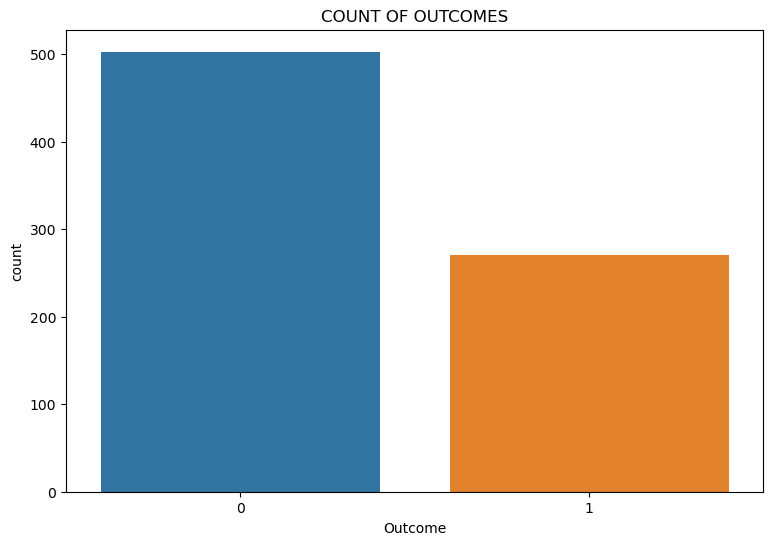

In [18]:
plt.figure(figsize=(9,6))
sns.countplot(data=df,x='Outcome')
plt.title('COUNT OF OUTCOMES')
plt.show()

### =>> OVERVIEW :
### Here, getting the total count of who had diabetes and who did not have diabetes............so, as we can see
### that, count of non-diabetic women is the highest.

### > RELATIONSHIP BETWEEN THE NUMBER OF PREGNANCIES AND THE OUTCOME :

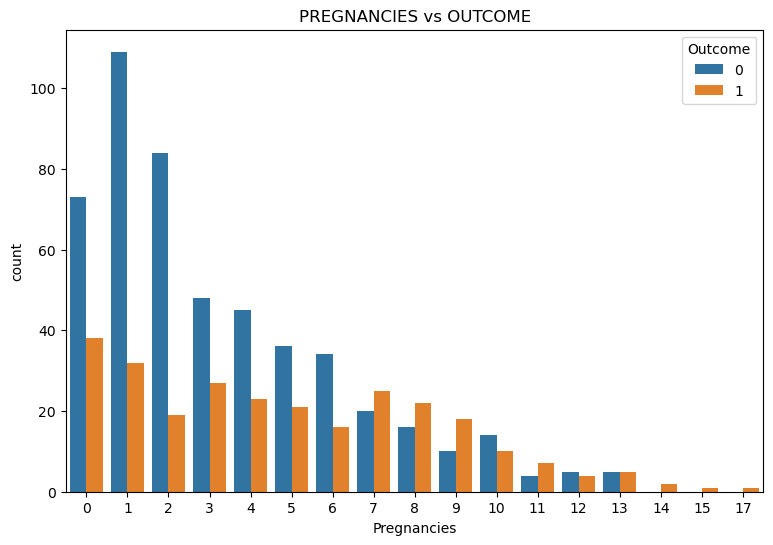

In [19]:
plt.figure(figsize=(9,6))
sns.countplot(data=df,x='Pregnancies', hue='Outcome')
plt.title('PREGNANCIES vs OUTCOME')
plt.show()

### =>> OVERVIEW :
### The above visualisation tells that the distribution of diabetes is highest in the people with 0 pregnancy.
### It also says that the likelihood of not developing diabetes is the highest in the people with 1 pregnancy.

### => PIE-CHART

### > DISPLAY OF THE TOTAL PERCENTAGE OF THE OUTCOMES :

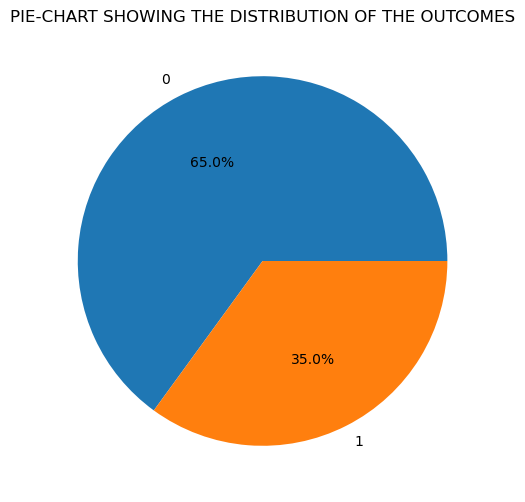

In [20]:
plt.figure(figsize=(15,6))
out_come=df['Outcome'].value_counts()
plt.pie(out_come.values, labels=out_come.index, autopct='%1.1f%%')
plt.title('PIE-CHART SHOWING THE DISTRIBUTION OF THE OUTCOMES')
plt.show()

### =>> OVERVIEW :

### The above plot shows the distribution (percentages) of people who had diabetes (1) , which is 35.0% and the 
### people without diabetes(0), which is 65.0%....so we can interpret that the distribution of non-diabetic 
### condition is more than those who had diabetes.

### => DENSITY PLOT

### > DISTRIBUTION OF BLOOD PRESSURE WITH RESPECT TO OUTCOME :

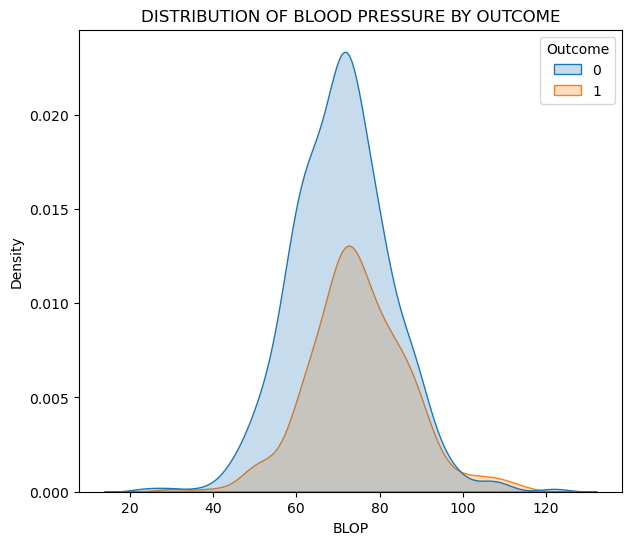

In [21]:
plt.figure(figsize=(7,6))
sns.kdeplot(data=df,x='BLOP',hue='Outcome',fill=True)
plt.title('DISTRIBUTION OF BLOOD PRESSURE BY OUTCOME')
plt.show()

### =>> OVERVIEW :
### From the above visualisation I can say, that the distribution of Blood Pressure of a person both with diabetes 
### is slightly left skewed and whereas, without diabetes is almost normally distributed.

### > DISTRIBUTION OF PREGNANCIES WITH RESPECT TO OUTCOME :

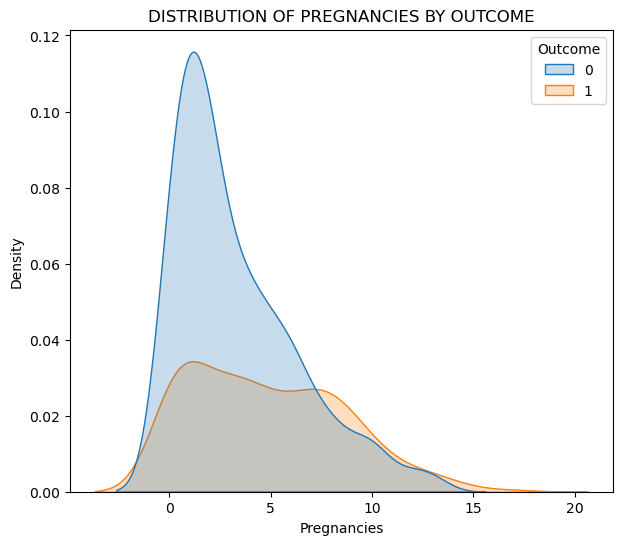

In [22]:
plt.figure(figsize=(7,6))
sns.kdeplot(data=df,x='Pregnancies',hue='Outcome',fill=True)
plt.title('DISTRIBUTION OF PREGNANCIES BY OUTCOME')
plt.show()

### =>> OVERVIEW :
### From the above plot , I can easily interpret that the distribution of Pregnancies in female is right 
### skewed , both with the diabetic and non-diabetic conditions, that says that , the mean is greater 
### than the median.

### => HISTOGRAM

### > DISTRIBUTION OF EACH FEATURES IN THE DATA :

<Figure size 1400x800 with 0 Axes>

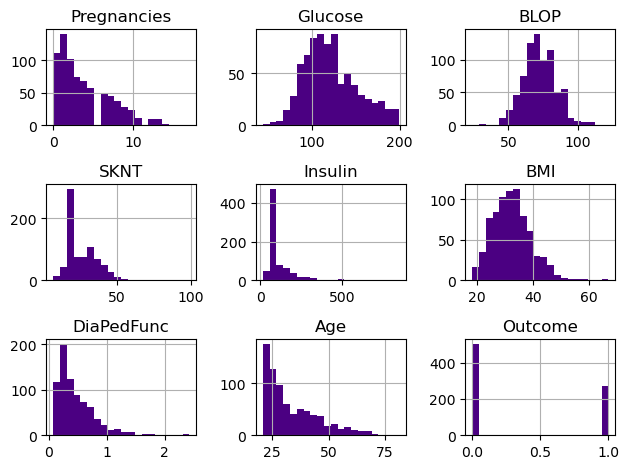

In [23]:
plt.figure(figsize=(14,8))
df.hist (bins=20, color='Indigo')
plt.tight_layout()
plt.show()

### =>> OVERVIEW :
### From the above plots I came to know regarding the distribution of various features in the data, that is, the 
### distribution of some of the features are right skewed, which tells us that the mean is greater than the 
### median,such as ,'Pregnancies','Skin Thickness','Insulin','Diabetes Pedigree Function' ,'BMI' and 'Age',these 
### features are right skewed. On the otherhand, the feature, 'Blood Pressure' is slightly left skewed, 
### that is, median is greater than mean.

### * BIVARIATE ANALYSIS 

### => PAIR PLOT

### > VISUALISING THE PLOTS OF EACH FEATURES PLOTTED AGAINST EACH ONE OF THEM :

<Figure size 1200x800 with 0 Axes>

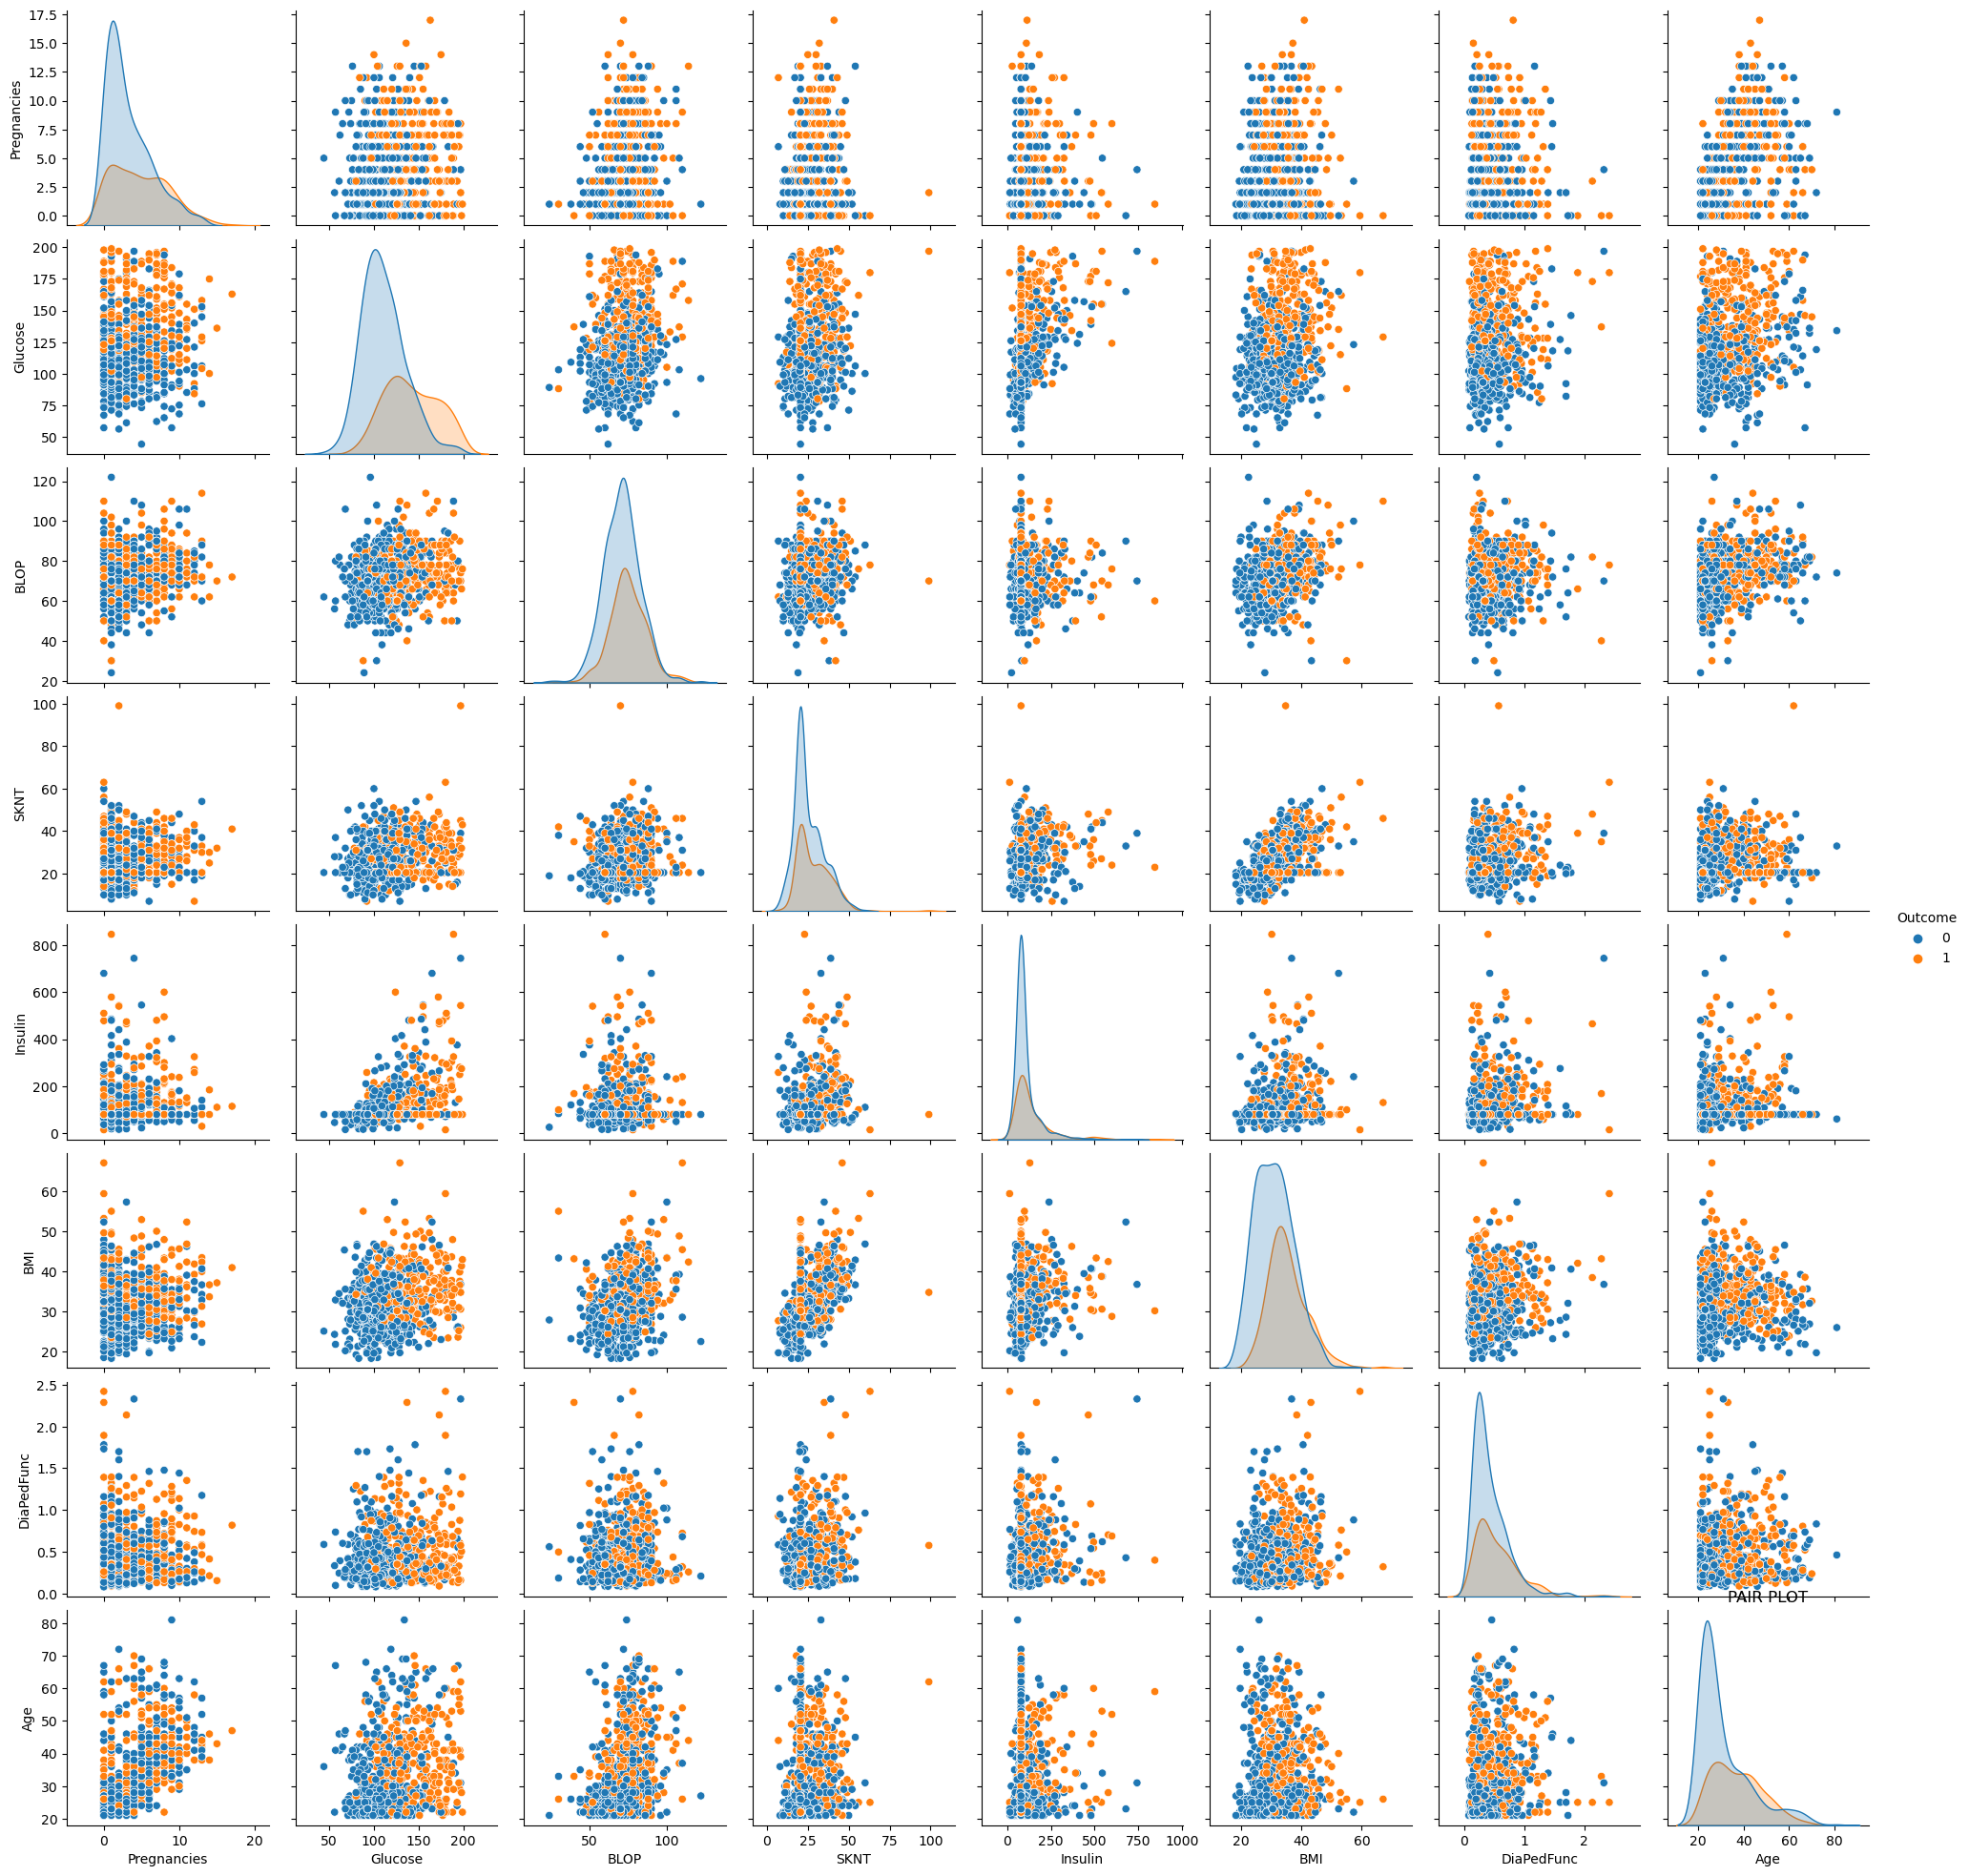

In [24]:
plt.figure(figsize=(12,8))
sns.pairplot(df, hue='Outcome')
plt.title('PAIR PLOT')
plt.show()

### =>> OVERVIEW :
### So, here as we can see that each features are being plotted with respect to each features in the dataframe 
### based on the target variable which is 'Outcome'

### => SCATTER PLOT

### > RELATION BETWEEN THE INSULIN AND GLUCOSE FOR PREDICTING THE DIABETES :

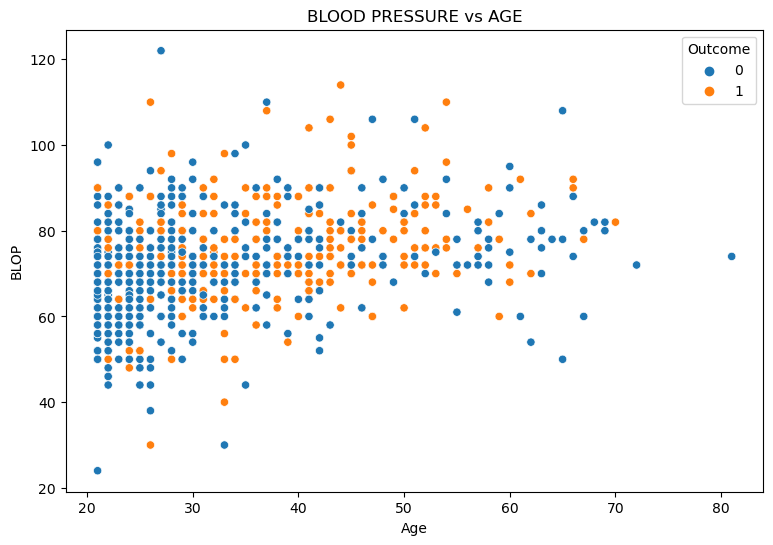

In [25]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=df, x='Age', y='BLOP',hue='Outcome')
plt.title('BLOOD PRESSURE vs AGE')
plt.show()

### =>> OVERVIEW:
### Here, I can see that  the features, Blood Pressure and Age holds a positive correlation with each other, this
### means,  with an  increases in the age of a female, the Blood Pressure also increases ,that indicates that the
### Blood  Pressure is definitely correlated to Age, for the prediction of the diabetes.

### => CORRELATION MATRIX - 
### >It is  mostly used to understand the correlation between certain two variables, that is, to carry out 
### bivariate analysis.

In [26]:
corre_late=df.corr()
corre_late

Pregnancies   Glucose      BLOP      SKNT   Insulin       BMI  \
Pregnancies     1.000000  0.130240  0.211584  0.013605 -0.015813  0.023568   
Glucose         0.130240  1.000000  0.218230  0.157797  0.396914  0.231821   
BLOP            0.211584  0.218230  1.000000  0.129309  0.007858  0.282002   
SKNT            0.013605  0.157797  0.129309  1.000000  0.241076  0.534957   
Insulin        -0.015813  0.396914  0.007858  0.241076  1.000000  0.190754   
BMI             0.023568  0.231821  0.282002  0.534957  0.190754  1.000000   
DiaPedFunc     -0.030650  0.138511 -0.000542  0.154904  0.159300  0.154381   
Age             0.539624  0.269178  0.318907  0.021429  0.037228  0.025095   
Outcome         0.218197  0.493065  0.159746  0.169119  0.176824  0.309725   

             DiaPedFunc       Age   Outcome  
Pregnancies   -0.030650  0.539624  0.218197  
Glucose        0.138511  0.269178  0.493065  
BLOP          -0.000542  0.318907  0.159746  
SKNT           0.154904  0.021429  0.169119  
Insulin        0.159300  0.037228  0.176824  
BMI            0.154381  0.025095  0.309725  
DiaPedFunc     1.000000  0.033319  0.172300  
Age            0.033319  1.000000  0.244925  
Outcome        0.172300  0.244925  1.000000

### => HEATMAP

### > Visualise the correlation matrix as well, so that it gives more clarity :

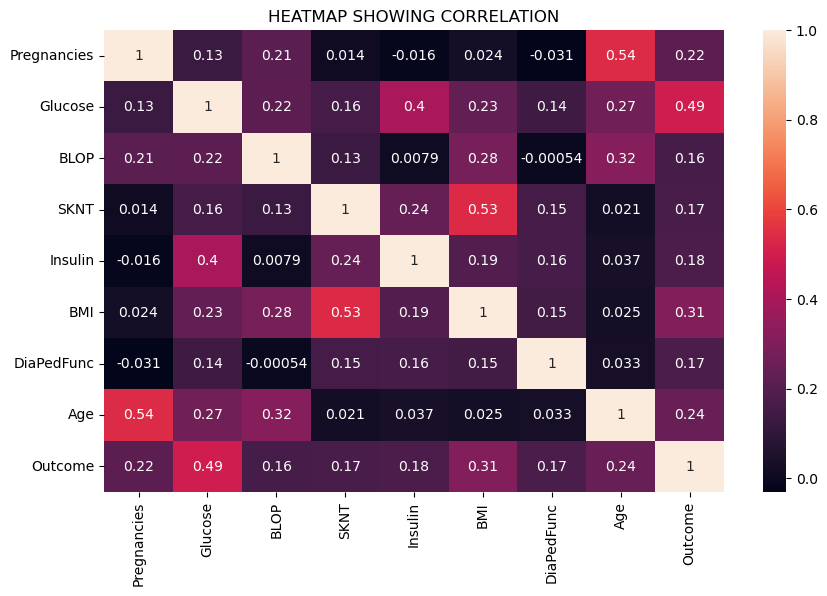

In [27]:
plt.figure(figsize=(10,6))
sns.heatmap(corre_late, annot=True)
plt.title('HEATMAP SHOWING CORRELATION')
plt.show()

### =>> OVERVIEW :
### From this viasualisation, we can see that :
### ** If it is nearer to 1, then it says that the  two variables are perfectly correlated to each other.
### ** If, it is nearer to -1, then it means the two variables are poorly correlated to eachother.

### As, we can see from the table and heatmap, the pairs which are correlated are:
### ** Age and Pregnancies
### ** Skinthickness and BMI
### ** Glucose and Insulin

### => VIOLIN PLOT

### > VISUALISATION OF GLUCOSE WITH RESPECT TO OUTCOME :

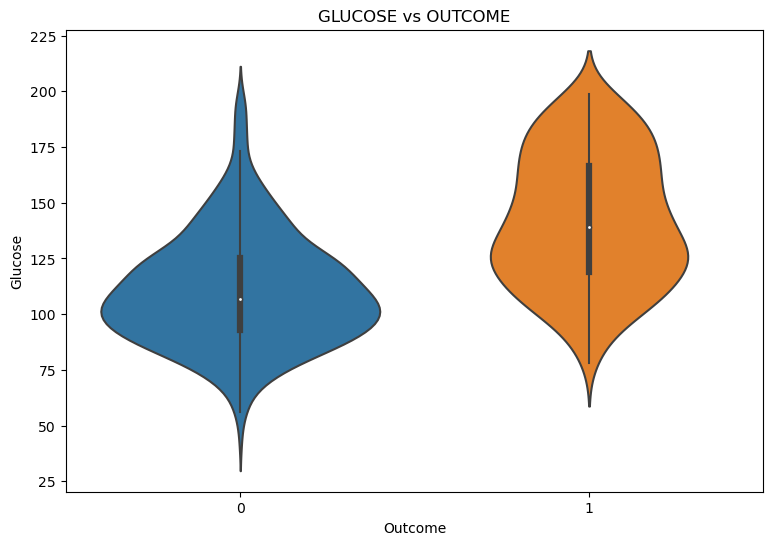

In [28]:
plt.figure(figsize=(9,6))
sns.violinplot(data=df, x='Outcome', y='Glucose',)
plt.title('GLUCOSE vs OUTCOME')
plt.show()

### =>> OVERVIEW :
### From here we can tell that,the maximum females with non-diabetic conditions, are concentrated at the 
### Glucose level of 100mL as compared to those in diabetic condition. Whereas, maximum number of diabetic 
### females are concentrated around the Glucose level in the range of 175-200 mL with higher median value 
### of Glucose than  the people with non-diabetic condition.

### > VISUALISATION OF INSULIN WITH RESPECT TO OUTCOME :

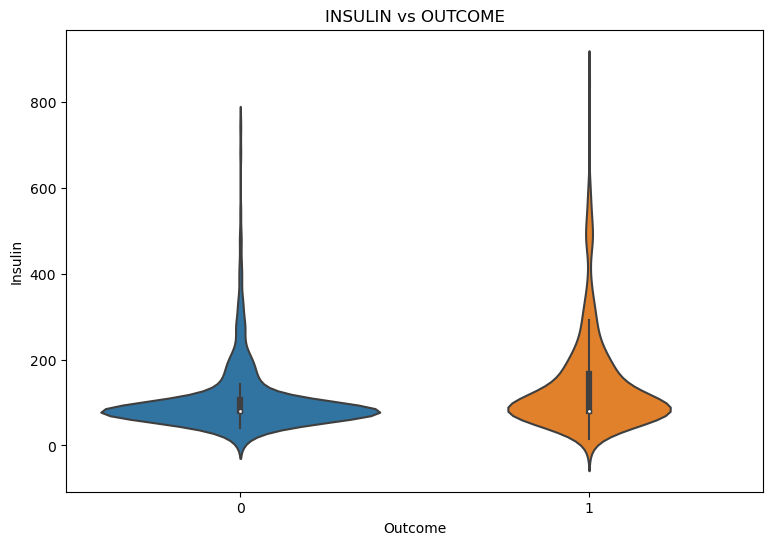

In [29]:
plt.figure(figsize=(9,6))
sns.violinplot(data=df, x='Outcome', y='Insulin')
plt.title('INSULIN vs OUTCOME')
plt.show()

### =>> OVERVIEW :
### Hereby, it is pretty understandable that the maximum people with non-diabetic condition is having a Insulin 
### level in the range of (0-200)mL, as its showing that its wider as compared to that of those who are diabetic 
### (less people). However, we can also see that the median value of Insulin level is more in diabetic females as 
### compared to that in  non-diabetic females, also along with the maximum number of outliers in this category.

### => BOX PLOT

Text(0.5, 1.0, 'BOX-PLOT FOR ALL THE FEATURES')

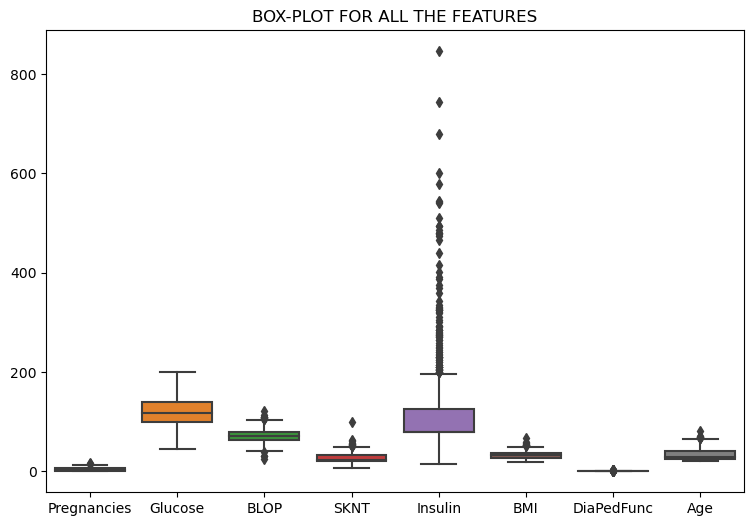

In [30]:
plt.figure(figsize=(9,6))
sns.boxplot(data=df.drop('Outcome' ,axis=1))
plt.title('BOX-PLOT FOR ALL THE FEATURES')

### =>> OVERVIEW :
### From the above visualization, I would interpret that all the features(independent variables) are containing 
### outliers , we need to remove it in order to get a good outcome from this dataset.

### =>> LINE PLOT

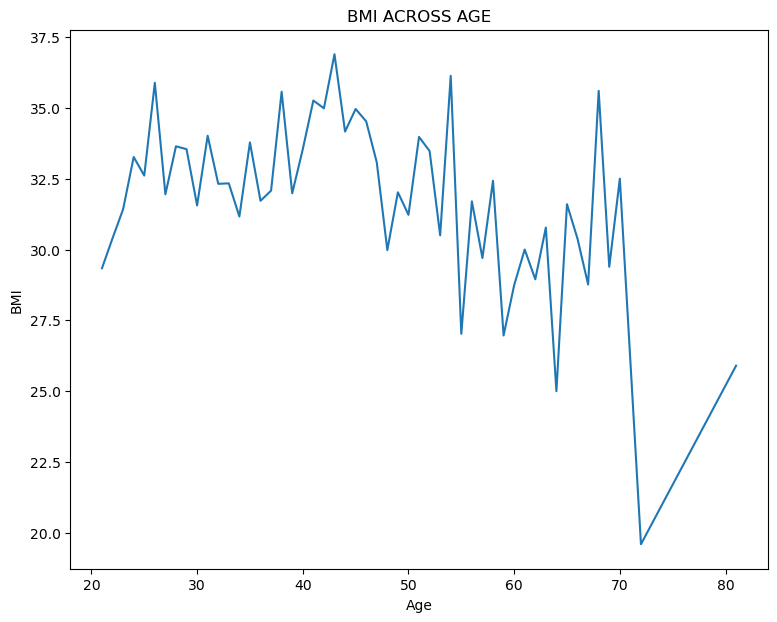

In [31]:
plt.figure(figsize=(9,7))
sns.lineplot(data=df, x='Age', y='BMI', ci=None)
plt.title('BMI ACROSS AGE')
plt.show()

### =>> OVERVIEW : 
### As, I can see the above plot, so, I can easily interpret that BMI is positively correlated with Age, that is,it 
### increases with the increase in Age of a person, though it suddenly got decreased at the Age of 71, again, it 
### suddenly started increasing  with increase in Age of a person.

### * MULTIVARIATE ANALYSIS :

### => SCATTER-PLOT MATRIX

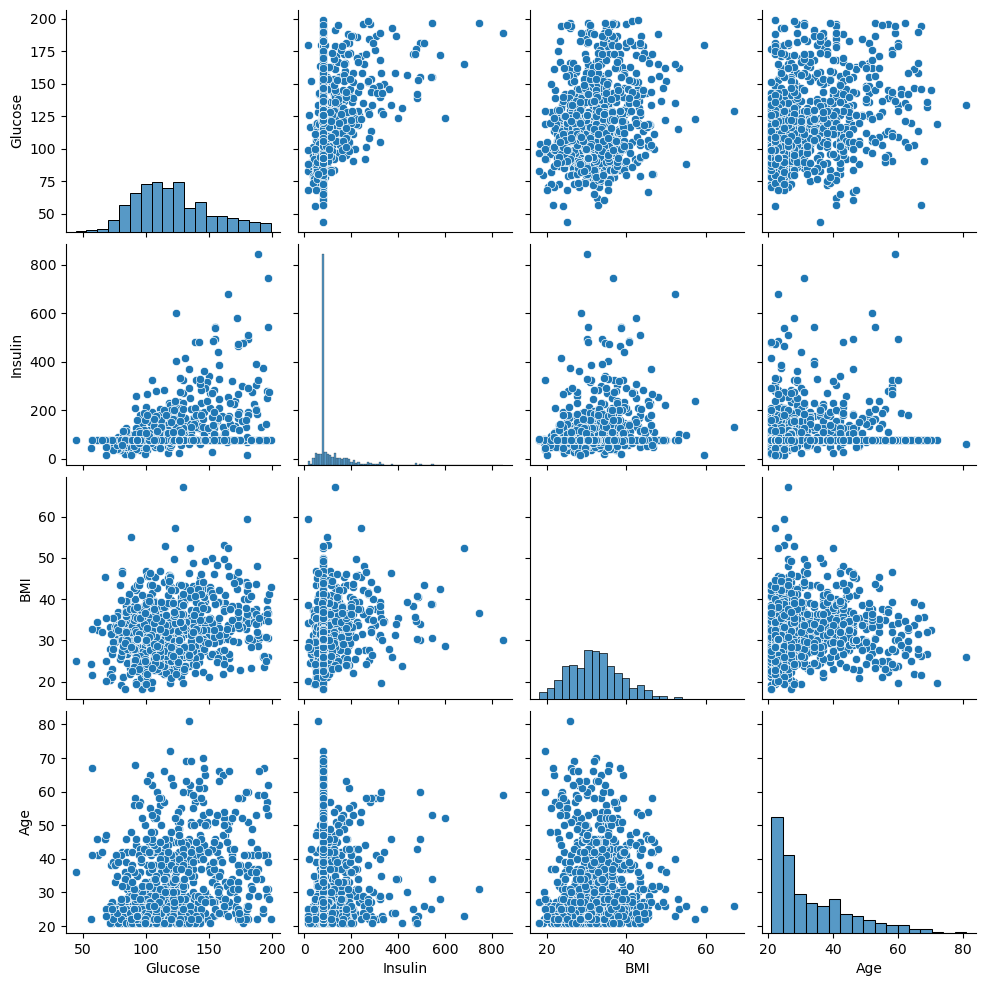

In [32]:
sns.pairplot(df[['Glucose','Insulin','BMI','Age']])
plt.show()

### =>> OVERVIEW:
### As, we can see that each variables are plotted against each variables, where it is forming a matrix of scatter
### plot.

### >> Now, as i am done with my data visualisations.....now i can perform the next step which is preprocessing.

### 3. PREPROCESSING

### 3.1 REMOVAL OF THE OUTLIERS :

### At first I need to calculate the z-scores first :

In [33]:
z_scores=np.abs((df - df.mean()) / df.std())

### Defining a threshold value:

In [34]:
threshold=3

### Stating a condition :

In [35]:
df=df[(z_scores<threshold).all(axis=1)]

### Thereby, receiving a fresh data : without null values and also without outliers.

In [36]:
df

Pregnancies  Glucose  BLOP       SKNT    Insulin   BMI  DiaPedFunc  Age  \
0              6      148    72  35.000000  79.180879  33.6       0.627   50   
1              1       85    66  29.000000  79.180879  26.6       0.351   31   
2              8      183    64  20.497416  79.180879  23.3       0.672   32   
3              1       89    66  23.000000  94.000000  28.1       0.167   21   
5              5      116    74  20.497416  79.180879  25.6       0.201   30   
..           ...      ...   ...        ...        ...   ...         ...  ...   
769            1       93    70  31.000000  79.180879  30.4       0.315   23   
770            1      126    60  20.497416  79.180879  30.1       0.349   47   
771            1       93    70  31.000000  79.180879  30.4       0.315   23   
772            1      126    60  20.497416  79.180879  30.1       0.349   47   
773            1       93    70  31.000000  79.180879  30.4       0.315   23   

     Outcome  
0          1  
1          0  
2          1  
3          0  
5          0  
..       ...  
769        0  
770        1  
771        0  
772        1  
773        0  

[724 rows x 9 columns]

### 3.2 DATA TRANSFORMATION AND SCALING - FEATURE ENGINEERING :

In [37]:
scaler=StandardScaler()

In [38]:
scaler.fit(df.drop('Outcome',axis=1))

StandardScaler()

In [39]:
scaled_feat= scaler.transform(df.drop('Outcome', axis=1))
scaled_feat

array([[ 0.66951347,  0.94942318, -0.01893193, ...,  0.23055071,
         0.63360803,  1.50765482],
       [-0.85959616, -1.18089412, -0.54951452, ..., -0.85485906,
        -0.34597472, -0.17123288],
       [ 1.28115732,  2.13293279, -0.72637538, ..., -1.36655223,
         0.79332261, -0.08287037],
       ...,
       [-0.85959616, -0.91037764, -0.19579279, ..., -0.26563661,
        -0.47374639, -0.87813296],
       [-0.85959616,  0.20550285, -1.08009711, ..., -0.31215417,
        -0.35307315,  1.24256729],
       [-0.85959616, -0.91037764, -0.19579279, ..., -0.26563661,
        -0.47374639, -0.87813296]])

### >> Now, i am simply creating a new dataframe of only independent variables after scaling the features.

In [40]:
df_feat= pd.DataFrame(scaled_feat, columns=df.columns[:-1])

In [41]:
df_feat.head()

Pregnancies   Glucose      BLOP      SKNT   Insulin       BMI  DiaPedFunc  \
0     0.669513  0.949423 -0.018932  0.995977 -0.450231  0.230551    0.633608   
1    -0.859596 -1.180894 -0.549515  0.324842 -0.450231 -0.854859   -0.345975   
2     1.281157  2.132933 -0.726375 -0.626221 -0.450231 -1.366552    0.793323   
3    -0.859596 -1.045636 -0.549515 -0.346293 -0.210697 -0.622271   -0.999030   
4     0.363692 -0.132643  0.157929 -0.626221 -0.450231 -1.009918   -0.878357   

        Age  
0  1.507655  
1 -0.171233  
2 -0.082870  
3 -1.054858  
4 -0.259595

### 3.3 SPLITTING THE DATA INTO X AND Y

In [42]:
x= df_feat
x

Pregnancies   Glucose      BLOP      SKNT   Insulin       BMI  \
0       0.669513  0.949423 -0.018932  0.995977 -0.450231  0.230551   
1      -0.859596 -1.180894 -0.549515  0.324842 -0.450231 -0.854859   
2       1.281157  2.132933 -0.726375 -0.626221 -0.450231 -1.366552   
3      -0.859596 -1.045636 -0.549515 -0.346293 -0.210697 -0.622271   
4       0.363692 -0.132643  0.157929 -0.626221 -0.450231 -1.009918   
..           ...       ...       ...       ...       ...       ...   
719    -0.859596 -0.910378 -0.195793  0.548554 -0.450231 -0.265637   
720    -0.859596  0.205503 -1.080097 -0.626221 -0.450231 -0.312154   
721    -0.859596 -0.910378 -0.195793  0.548554 -0.450231 -0.265637   
722    -0.859596  0.205503 -1.080097 -0.626221 -0.450231 -0.312154   
723    -0.859596 -0.910378 -0.195793  0.548554 -0.450231 -0.265637   

     DiaPedFunc       Age  
0      0.633608  1.507655  
1     -0.345975 -0.171233  
2      0.793323 -0.082870  
3     -0.999030 -1.054858  
4     -0.878357 -0.259595  
..          ...       ...  
719   -0.473746 -0.878133  
720   -0.353073  1.242567  
721   -0.473746 -0.878133  
722   -0.353073  1.242567  
723   -0.473746 -0.878133  

[724 rows x 8 columns]

In [43]:
print(x.shape)

(724, 8)


In [44]:
y=df.iloc[:,-1]

In [45]:
y

0      1
1      0
2      1
3      0
5      0
      ..
769    0
770    1
771    0
772    1
773    0
Name: Outcome, Length: 724, dtype: int64

In [46]:
print(y.shape)

(724,)


In [47]:
print(x.head())

   Pregnancies   Glucose      BLOP      SKNT   Insulin       BMI  DiaPedFunc  \
0     0.669513  0.949423 -0.018932  0.995977 -0.450231  0.230551    0.633608   
1    -0.859596 -1.180894 -0.549515  0.324842 -0.450231 -0.854859   -0.345975   
2     1.281157  2.132933 -0.726375 -0.626221 -0.450231 -1.366552    0.793323   
3    -0.859596 -1.045636 -0.549515 -0.346293 -0.210697 -0.622271   -0.999030   
4     0.363692 -0.132643  0.157929 -0.626221 -0.450231 -1.009918   -0.878357   

        Age  
0  1.507655  
1 -0.171233  
2 -0.082870  
3 -1.054858  
4 -0.259595  


In [48]:
print(y.head())

0    1
1    0
2    1
3    0
5    0
Name: Outcome, dtype: int64


### 3.4 CONTROLLING THE RANDOMNESS : To get the same split after every run.

In [49]:
np.random.seed(42)

### 4. TRAIN TEST SPLIT

### >>> Now, next step is to divide the data into training and testing

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [51]:
print(x_train.shape, y_train.shape)

(579, 8) (579,)


In [52]:
print(x_test.shape, y_test.shape)

(145, 8) (145,)


### 5. ALGORITHM (MODEL BUILDING)

### >>> So, i will go with the first classification algorithm , under supervised machine learning , that is Logistic 
### Regression.

### 5.1 LOGISTIC REGRESSION 

In [53]:
log_m=LogisticRegression()

### >>> Firstly, I am training my model on the basis of my train data (x_train , y_train).

In [54]:
log_m.fit(x_train,y_train)

LogisticRegression()

### >>> Secondly, I am testing my model on the basis of my test data (x_test).

In [55]:
pred_test= log_m.predict(x_test)

In [56]:
pred_test

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

### >>> Now, as I have trained my model, now, lets plot the feature importances plot.

### => FEATURE IMPORTANCES PLOT :

In [57]:
imf=np.abs(log_m.coef_[0])

In [58]:
imf

array([0.36407302, 1.13146049, 0.04781007, 0.05942506, 0.17642399,
       0.50887278, 0.43227305, 0.13754034])

### >>> Sorting the features.

In [59]:
indices=np.argsort(imf)[::-1]

### >>> Now, plotting the feature importances plot.

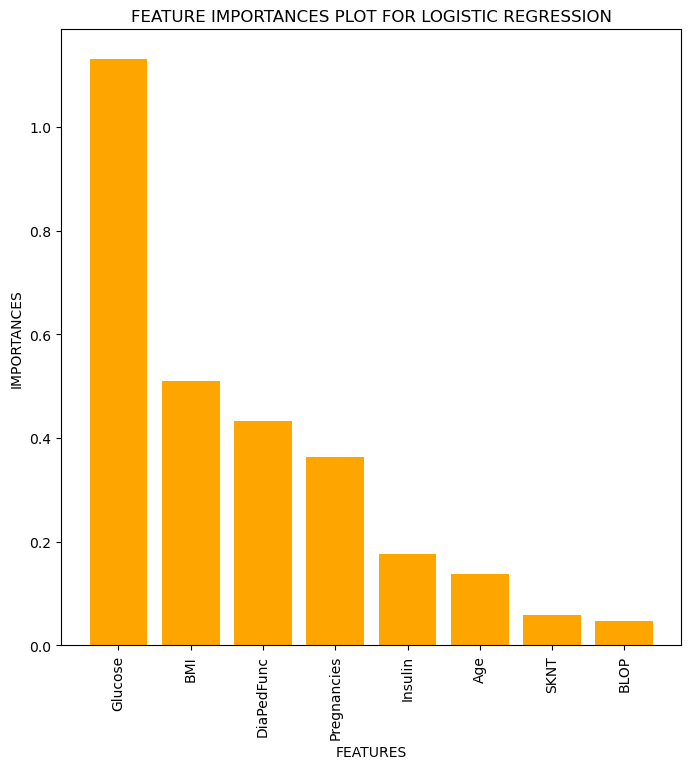

In [60]:
plt.figure(figsize=(8,8))
plt.bar(range(x.shape[1]), imf[indices], color='Orange')
plt.xticks(range(x.shape[1]),x.columns[indices], rotation=90)
plt.title('FEATURE IMPORTANCES PLOT FOR LOGISTIC REGRESSION')
plt.xlabel('FEATURES')
plt.ylabel('IMPORTANCES')
plt.show()

### =>> OVERVIEW :
### From the above , I have come to know that , Glucose, BMI, Diabetes Pedigree Function , 
### Pregnancies and Insulin are the leading the features for predicting the diabetes .

### >>> Now, after getting prediction by the model based on the x_test , I will compare that with y_test.

### 6. MODEL EVALUATION

###  6.1 EVALUATION METRICS OF LOGISTIC REGRESSION MODEL- Most importantly is the Confusion Matrix
### and Classification Report.

### => NOW, LETS GET THE CONFUSION MATRIX :

In [61]:
con_mat= confusion_matrix(y_test, pred_test)
con_mat

array([[93,  7],
       [20, 25]], dtype=int64)

### =>> OVERVIEW :
### So, from the Confusion Matrix I have came to know the following values:
#### TRUE NEGATIVE   : 93
#### FALSE POSITIVE  : 7
#### FALSE NEGATIVE  :20
#### TRUE POSITIVE   :25

### >> NOW LETS PROCEED WITH THE CLASSIFICATION REPORT :

In [62]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       100
           1       0.78      0.56      0.65        45

    accuracy                           0.81       145
   macro avg       0.80      0.74      0.76       145
weighted avg       0.81      0.81      0.80       145



### =>> OVERVIEW :
### Here, from the above Classification Report we can fetch the score of precision, recall, f1-score and also 
### the accuracy score respectively.

### >> Now, lets visualize my confusion matrix ......to add more clarity in the outcome.

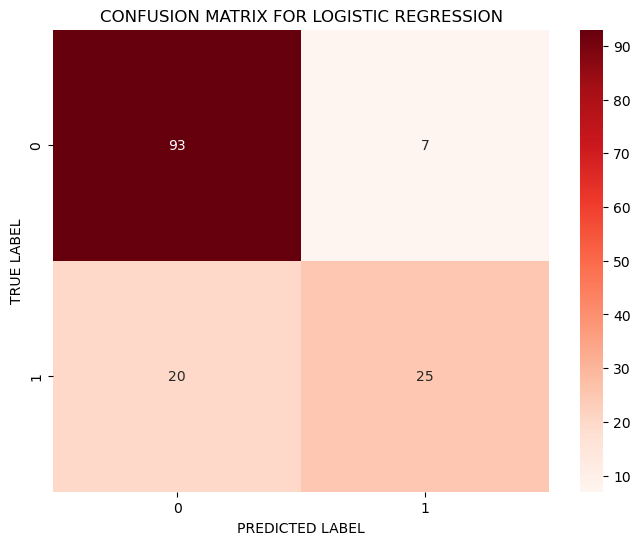

In [63]:
plt.figure(figsize=(8,6))
sns.heatmap(con_mat, annot=True, cmap='Reds')
plt.title ('CONFUSION MATRIX FOR LOGISTIC REGRESSION')
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.show()

### >>> Now, lets go for  another supervised machine learning algorithm , which is Support Vector Machine 
### (support  vector classifier).

### 5.2 SUPPORT VECTOR MACHINE (SUPPORT VECTOR CLASSIFIER)

In [64]:
svr_m=SVC(kernel='linear')

### >>> Lets, first train the model based on my train data (x_train, y_train).

In [65]:
svr_m.fit(x_train, y_train)

SVC(kernel='linear')

### >>> Now, testing my model based on my test data (x_test).

In [66]:
predic_test= svr_m.predict(x_test)

In [67]:
predic_test

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

### >>> Lets, plot the Feature Importances plot, as the training of the model is over.

### => FEATURES IMPORTANCES PLOT :

In [68]:
impof=np.abs(svr_m.coef_[0])
impof

array([0.30543737, 0.91450093, 0.00149984, 0.07266841, 0.14454703,
       0.28278491, 0.37609846, 0.02926766])

### >>> Sorting the features.

In [69]:
indic=np.argsort(impof)[::-1]
indic

array([1, 6, 0, 5, 4, 3, 7, 2], dtype=int64)

### => FEATURE IMPORTANCES PLOT :

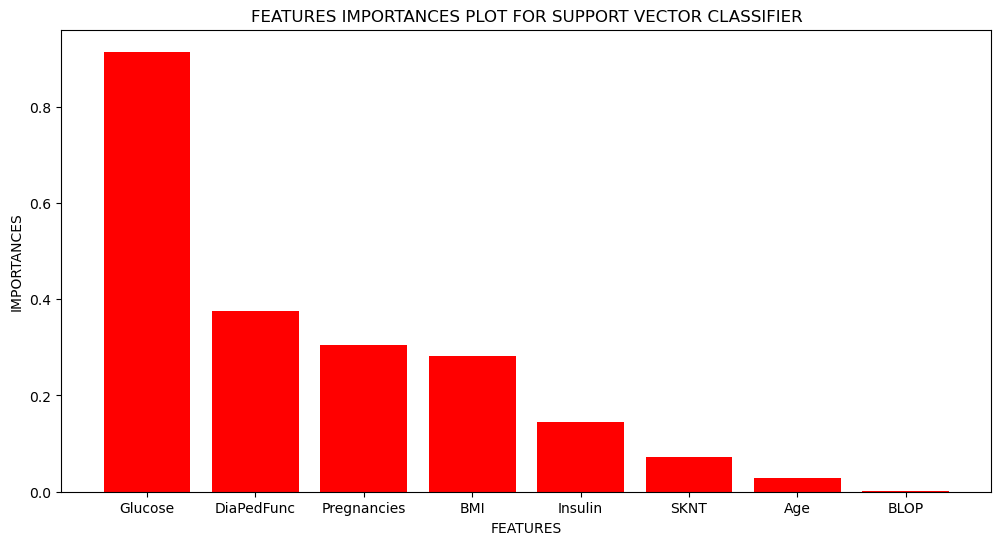

In [70]:
plt.figure(figsize=(12,6))
plt.bar(range(x.shape[1]), impof[indic], color='Red')
plt.xticks(range(x.shape[1]), x.columns[indic])
plt.title('FEATURES IMPORTANCES PLOT FOR SUPPORT VECTOR CLASSIFIER')
plt.xlabel('FEATURES')
plt.ylabel('IMPORTANCES')
plt.show()

### =>> OVERVIEW :
### The above plot tells us that , the Glucose, Diabetes Pedigree Function, Pregnancies, BMI and Insulin are the
### plays the most important role in the prediction of the diabetes.

### >>> So, I have got the prediction on the basis (x_test), lets compare the prediction with the y_test
### (actual test).

### 6.2 EVALUATING THE SUPPORT VECTOR CLASSIFIER MODEL PERFORMANCE 

### =>> LETS COME STRAIGHTAWAY TO THE CONFUSION MATRIX :

In [71]:
conf_mat= confusion_matrix(y_test,predic_test)
conf_mat

array([[93,  7],
       [21, 24]], dtype=int64)

### =>> OVERVIEW :
### Focusing on the Confusion Matrix, I have come to know about the following :
#### TRUE NEGATIVE : 93
#### FALSE POSITIVE : 7
#### FALSE NEGATIVE : 21
#### TRUE POSITIVE :  24

### =>> NOW, LETS BUILD THE CLASSIFICATION REPORT :

In [72]:
print(classification_report(y_test, predic_test))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       100
           1       0.77      0.53      0.63        45

    accuracy                           0.81       145
   macro avg       0.79      0.73      0.75       145
weighted avg       0.80      0.81      0.80       145



### =>> OVERVIEW :
### So, from the above Classification Report , I got to know about the score of precision , recall , f1-score and
### accuracy score , which futher helps to fetch the accurate outcome.

### >>> Thereby, I want to visualize my Confusion Matrix :

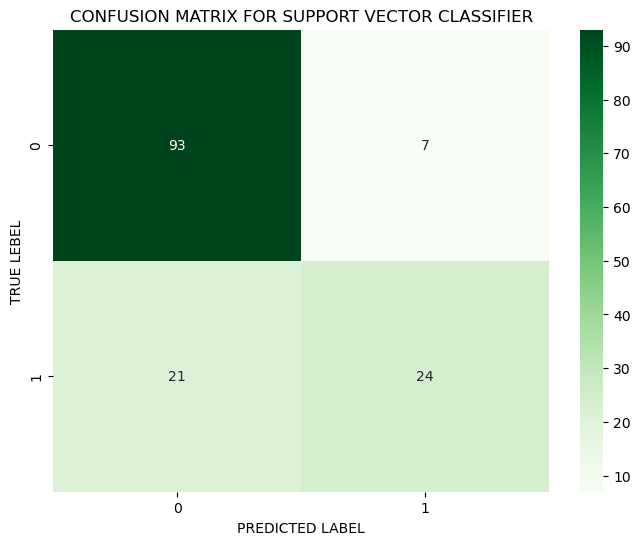

In [73]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot= True, cmap= 'Greens')
plt.title('CONFUSION MATRIX FOR SUPPORT VECTOR CLASSIFIER')
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LEBEL')
plt.show()

### =>> OVERVIEW :
### Lets, check the another algorithm of supervised machine learning , which is , Decision Tree ( Decision
### Tree Classifier)

### 5.3 DECISION TREE ( DECISION TREE CLASSIFIER)

In [74]:
clf=DecisionTreeClassifier()

### >> Now, lets train the model on the basis of x_train, y_train (train data).

In [75]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

### >>> Secondly , I shall test my model on the basis of x_test ( test data).

In [76]:
predict_test= clf.predict(x_test)

In [77]:
predict_test

array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

### >>> Now, lets visualize the decision tree as well.

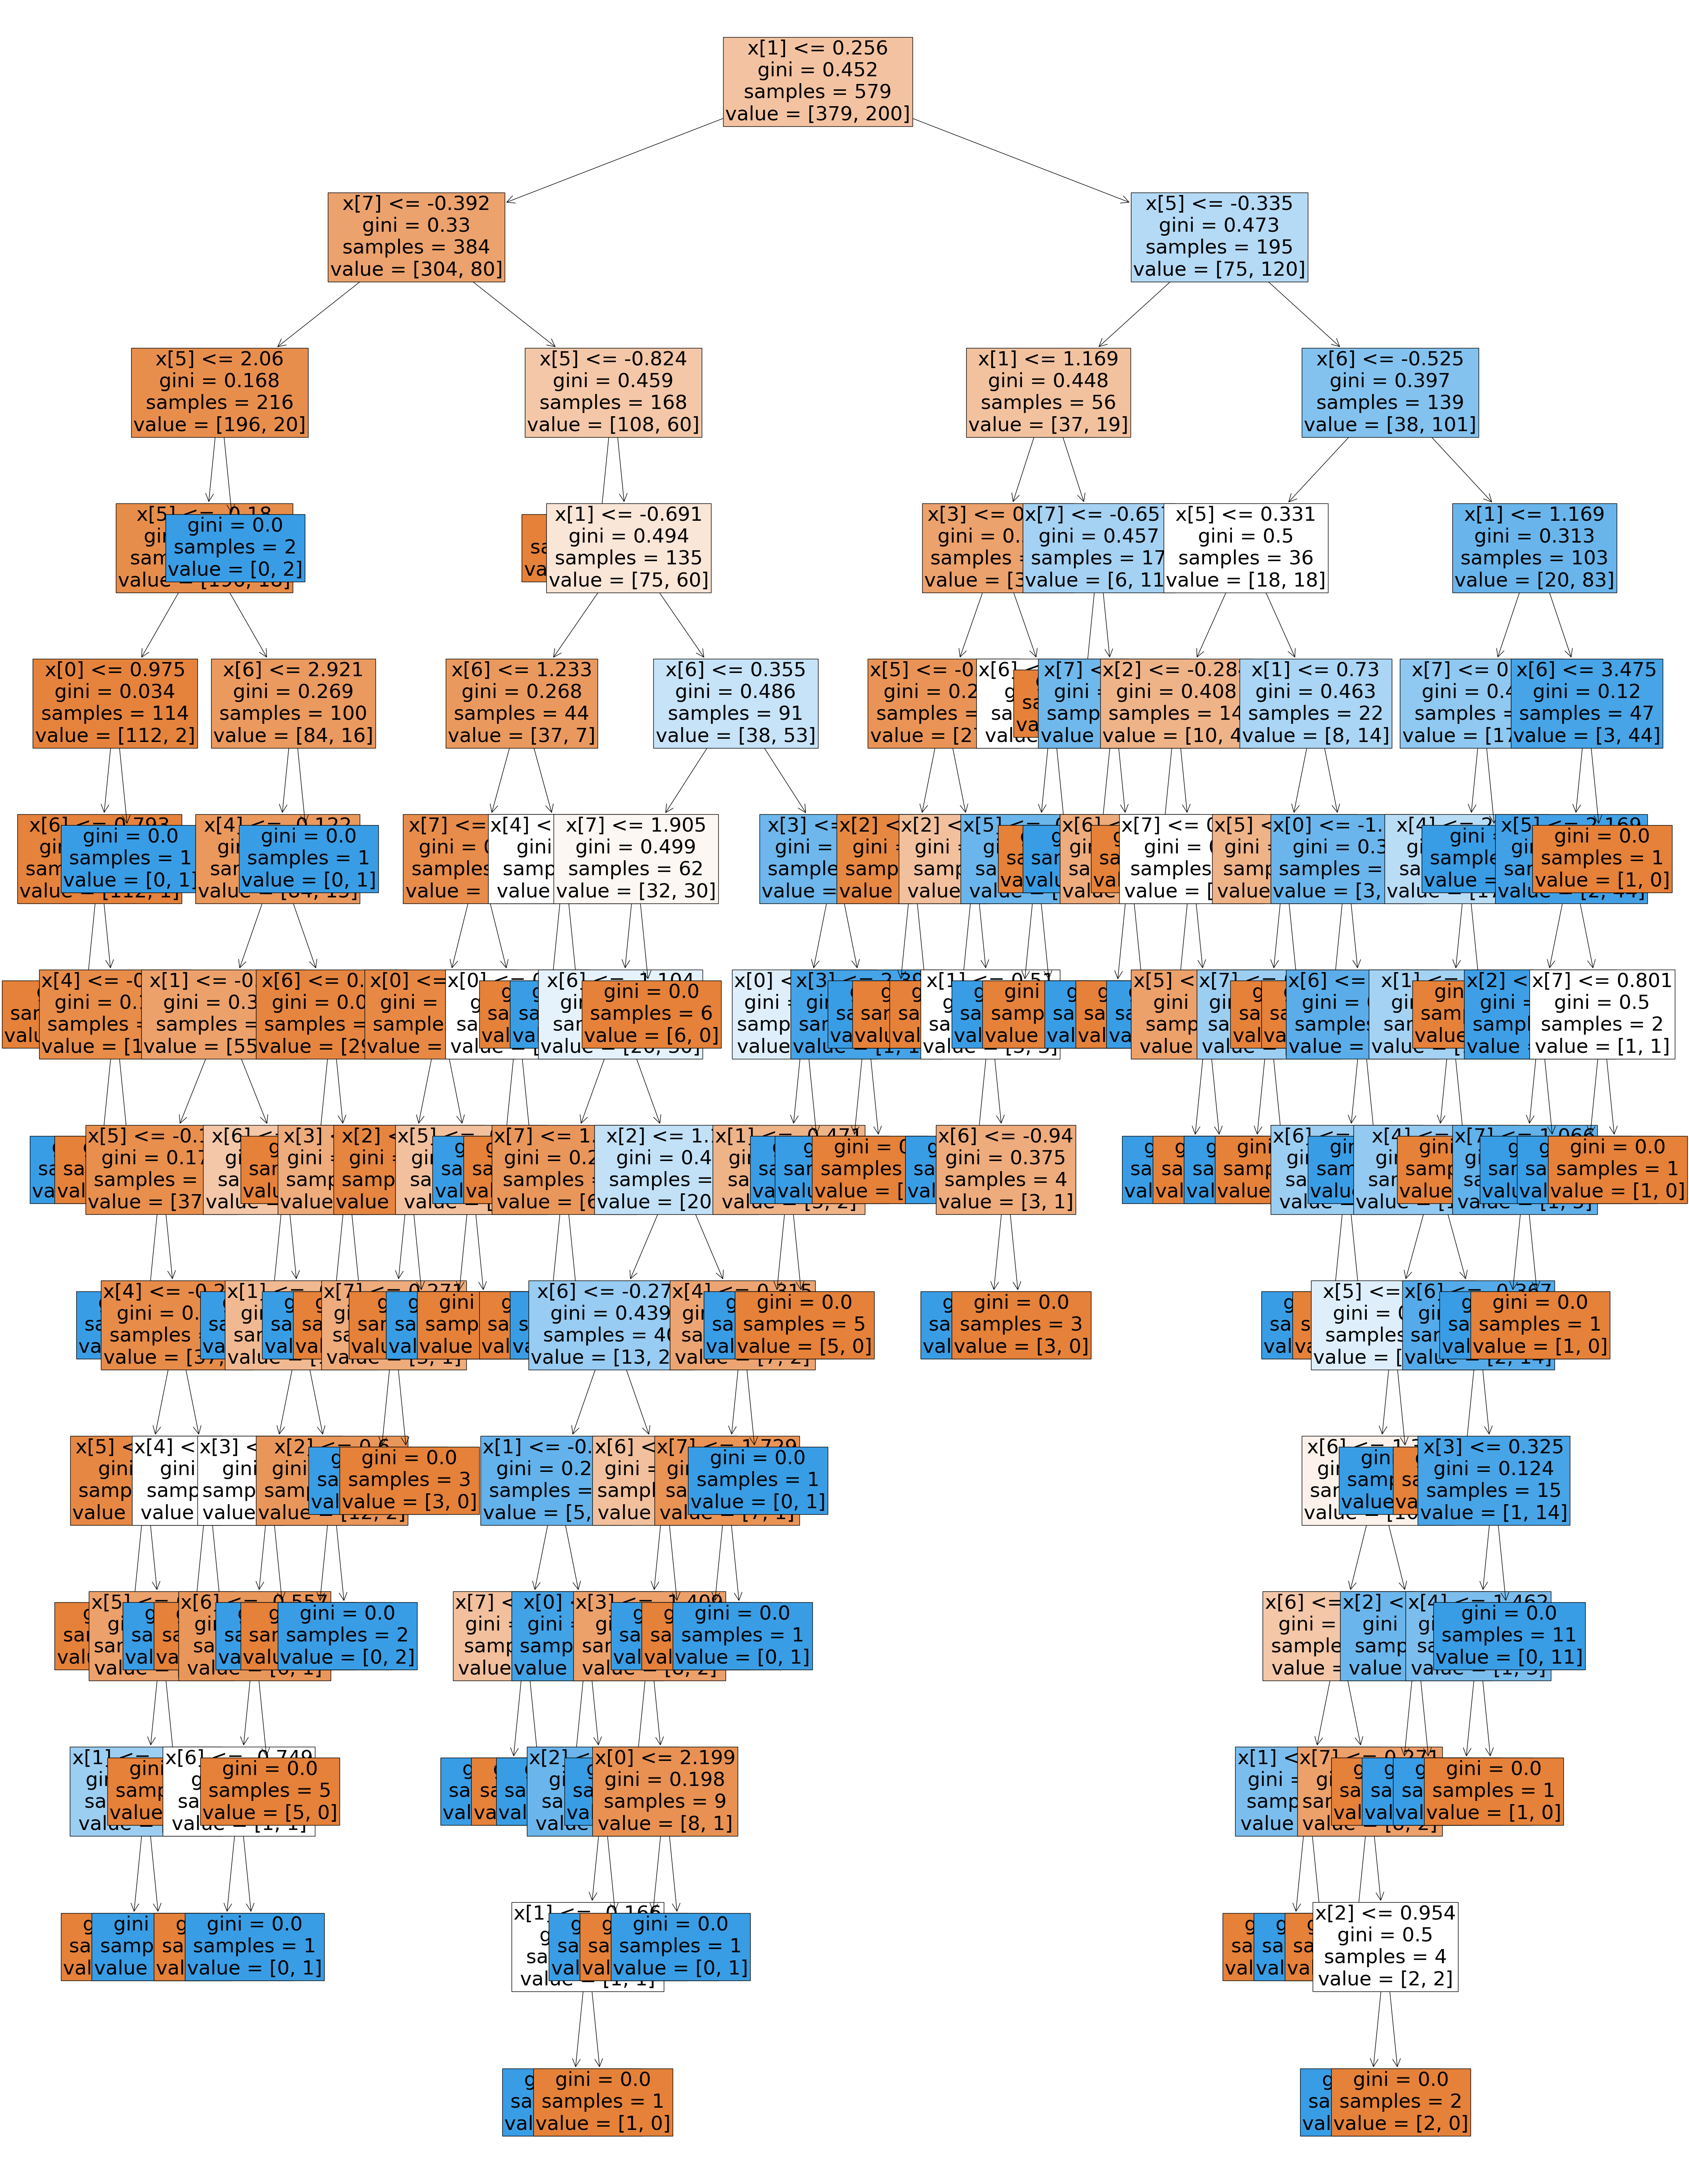

In [78]:
fig= plt.figure(figsize=(50,70))
tree.plot_tree(clf, filled=True, fontsize=35);


### >>> After training the model, I shall proceed with the Feature Importances Plot.


### =>> FEATURE IMPORTANCES PLOT :

In [79]:
importan=clf.feature_importances_

### >>> Sorting the feature importances in a descending order.

In [80]:
indi=np.argsort(importan)[::-1]
indi

array([1, 5, 7, 6, 4, 2, 3, 0], dtype=int64)

### >> Plotting the Feature Importances Plot.

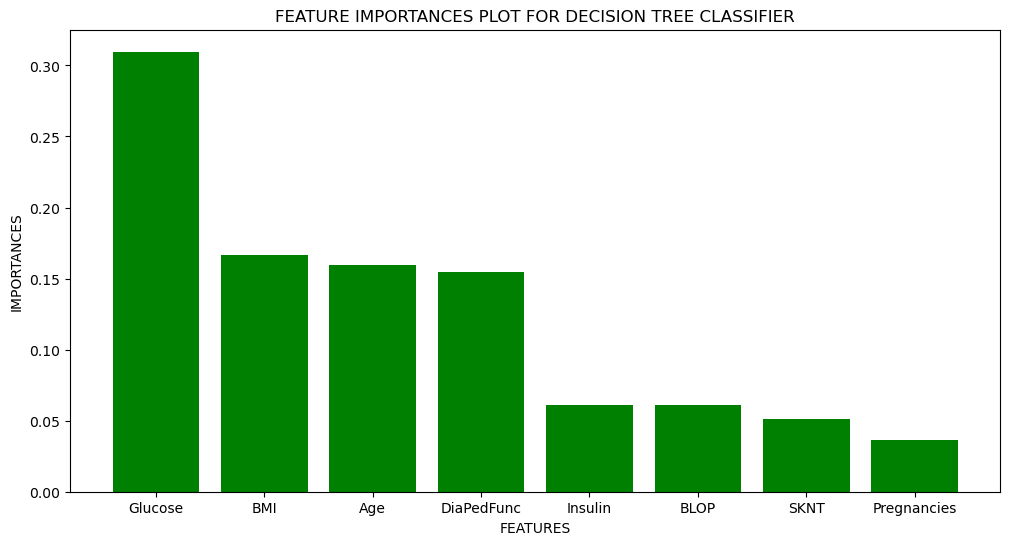

In [81]:
plt.figure(figsize=(12,6))
plt.bar(range(x.shape[1]),importan[indi],color='Green')
plt.xticks(range(x.shape[1]),x.columns[indi])
plt.title('FEATURE IMPORTANCES PLOT FOR DECISION TREE CLASSIFIER')
plt.xlabel('FEATURES')
plt.ylabel('IMPORTANCES')
plt.show()

### =>> OVERVIEW :
### Hereby , I can interpret that the 'Glucose','BMI','Age','Diabetes Pedigree Function' and 'Insulin' plays the most
### important roles in predicting diabetes.

### >>> Now , as we got the x_test prediction of the model, lets further compare this prediction with the 
### actual test , which is , y_test, so for that we need to move to the Evaluation Metrics.

### 6.3 EVALUATION OF THE PERFORMANCE OF THE DECISION TREE CLASSIFIER MODEL

### => LETS BEGIN WITH MY CONFUSION MATRIX :

In [82]:
cof_mat=confusion_matrix(y_test,predict_test)
cof_mat

array([[68, 32],
       [25, 20]], dtype=int64)

### =>> OVERVIEW :
### So, as I can see that my Confusion Matrix has given me all the below information regarding :
#### TRUE NEGATIVE   : 68
#### FALSE POSITIVE   : 32
#### FALSE NEGATIVE  : 25   
#### TRUE POSITIVE    :20

### =>> LETS COME STRAIGHTAWAY TO MY CLASSIFICATION REPORT :

In [83]:
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           0       0.73      0.68      0.70       100
           1       0.38      0.44      0.41        45

    accuracy                           0.61       145
   macro avg       0.56      0.56      0.56       145
weighted avg       0.62      0.61      0.61       145



### =>> OVERVIEW :
### From the above Classification Report , I came to know about the precision score, recall score, f1-score
### and the  accuracy score of the model.

### >> Now, lets visualise the Confusion Matrix as well :

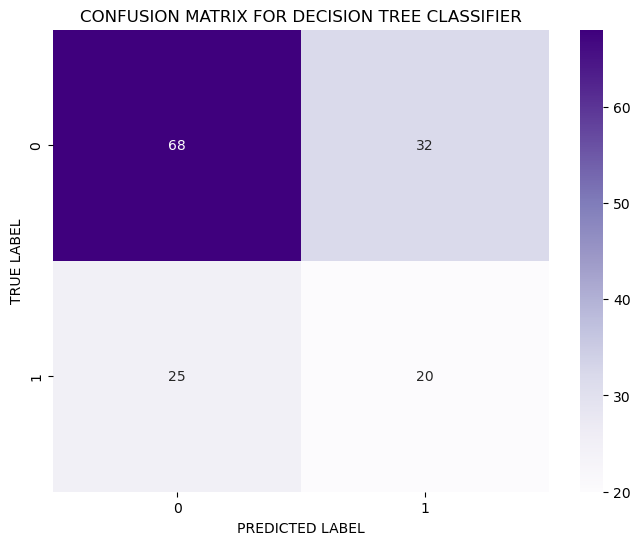

In [84]:
plt.figure(figsize=(8,6))
sns.heatmap(cof_mat, annot=True, cmap='Purples')
plt.title('CONFUSION MATRIX FOR DECISION TREE CLASSIFIER')
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.show()

### So,lastly, now, I would like to go for another, a slightly advanced supervised machine learning algorithm ,
### which is , Random Forest Algorithm (Random Forest Classifier).

### 5.4 RANDOM FOREST (RANDOM FOREST CLASSIFIER)

In [85]:
rf=RandomForestClassifier()

### >> Hereby, I would like to begin with training the model based on the training data ( x_train, y_train).

In [86]:
rf.fit(x_train,y_train)

RandomForestClassifier()

### >>> So, as the training is done , now lets test the model on the basis of the x_test which is, the test data.

In [87]:
rf_pred= rf.predict(x_test)
rf_pred

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

### >> Now, after training  and testing the model , I shall get the feature importances.....

### =>> FEATURE IMPORTANCES PLOT :

In [88]:
impor= rf.feature_importances_

### >> Creating a Dataframe with feature names and their importances.

In [89]:
feat_impor=pd.DataFrame({'Feature':x.columns, 'Importance':impor})

In [90]:
feat_impor

Feature  Importance
0  Pregnancies    0.081194
1      Glucose    0.259318
2         BLOP    0.078774
3         SKNT    0.070755
4      Insulin    0.067866
5          BMI    0.160830
6   DiaPedFunc    0.139342
7          Age    0.141921

### >> Now, lets sort the features by importance in descending order.

In [91]:
feat_impor=feat_impor.sort_values('Importance',ascending=False)

In [92]:
feat_impor

Feature  Importance
1      Glucose    0.259318
5          BMI    0.160830
7          Age    0.141921
6   DiaPedFunc    0.139342
0  Pregnancies    0.081194
2         BLOP    0.078774
3         SKNT    0.070755
4      Insulin    0.067866

### >>> Now, plotting the feature importance graph :

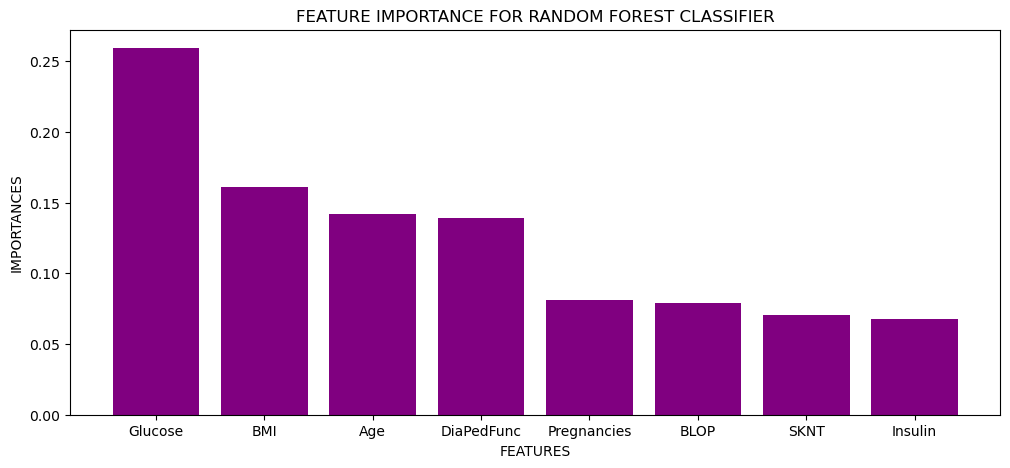

In [101]:
plt.figure(figsize=(12,5))
plt.bar(feat_impor['Feature'],feat_impor['Importance'],color='Purple')
plt.title('FEATURE IMPORTANCE FOR RANDOM FOREST CLASSIFIER')
plt.xlabel('FEATURES')
plt.ylabel('IMPORTANCES')
plt.show()

### =>> OVERVIEW :
### From here, I came to know that the , 'Glucose','BMI','Age','Diabetes Pedigree Function' and 'Pregnancies'  are
### playing the most important role in predicting diabetes.


### >>> As , I have got the predicted test value (x_test) of the model , now, lets  begin with the Evaluating the
### performance of the model on the basis of the actual test (y_test)

### 6.4 EVALUATION OF RANDOM FOREST CLASSIFIER

### >>> So, first I would like to build the most important, Confusion Matrix 

### =>> CONFUSION MATRIX :

In [94]:
com_mat=confusion_matrix(y_test, rf_pred)
com_mat

array([[86, 14],
       [18, 27]], dtype=int64)

### =>> OVERVIEW :
### As , I can see that the above Confusion Matrix gives me the following information :
#### TRUE NEGATIVE   : 86
#### FALSE POSITIVE  : 14
#### FALSE NEGATIVE  : 18
#### TRUE POSITIVE   : 27

### >>> Now, lets further move to Classification Report for more clarification .

### > CLASSIFICATION REPORT :

In [95]:
print(classification_report(y_test,rf_pred ))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       100
           1       0.66      0.60      0.63        45

    accuracy                           0.78       145
   macro avg       0.74      0.73      0.74       145
weighted avg       0.77      0.78      0.78       145



### =>> OVERVIEW :
### From the Classification Report , I got to know about my precision, recall, f1-score and the accuracy score.

### >> Now, lets visualize the Confusion Matrix through Heat Map.

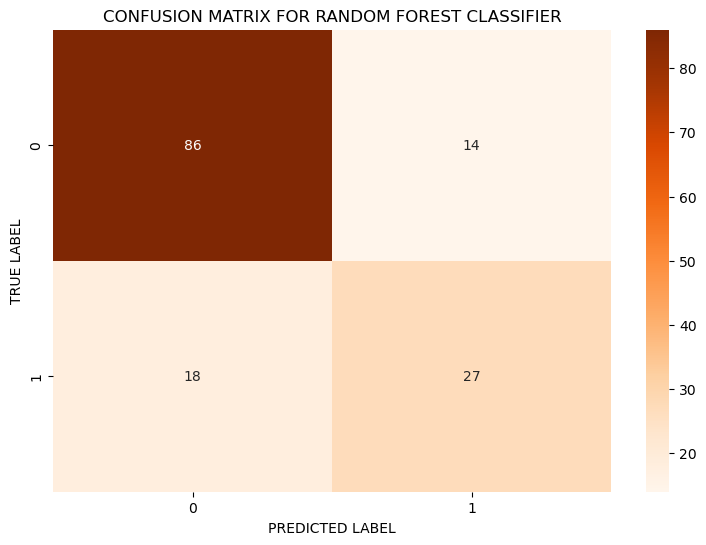

In [96]:
plt.figure(figsize=(9,6))
sns.heatmap(com_mat, annot=True, cmap='Oranges')
plt.title('CONFUSION MATRIX FOR RANDOM FOREST CLASSIFIER')
plt.xlabel('PREDICTED LABEL')
plt.ylabel('TRUE LABEL')
plt.show()

### >> Thereby, I can proceed with the comparison of the outcomes which I have got from the different 
### models above, so, lets start with the Comparison Table for all the models :

### 7. PAIR PLOT OF THE TOP 5 FEATURES :

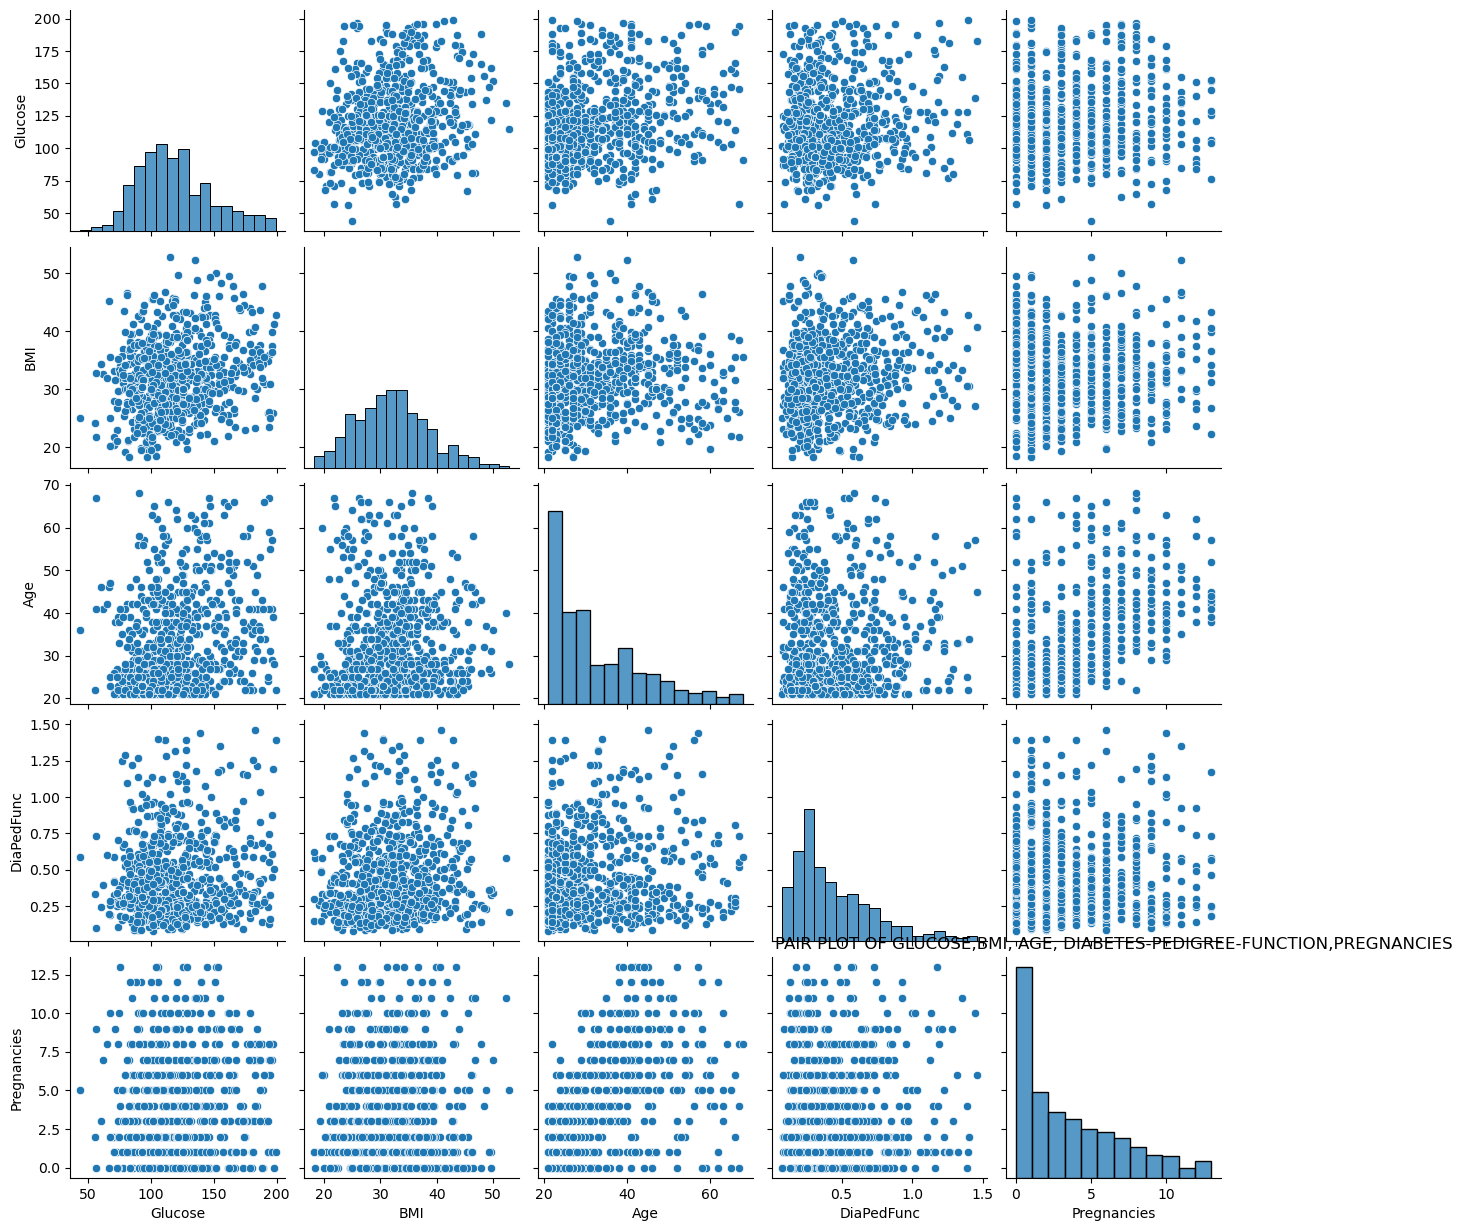

In [97]:
sns.pairplot(df[['Glucose','BMI','Age','DiaPedFunc','Pregnancies',]])
plt.title('PAIR PLOT OF GLUCOSE,BMI, AGE, DIABETES-PEDIGREE-FUNCTION,PREGNANCIES')
plt.show()

### =>> OVERVIEW :

### Here, I can see that each of the top 5 features are plotted with respect to each of them individually in
### pairs.

### 8. COMAPARISON TABLE :

### >> So, at first, I need to define my data.

In [98]:
data={'MODEL':['LOGISTIC REGRESSION', 'SUPPORT VECTOR CLASSIFIER', 'DECISION TREE CLASSIFIER', 'RANDOM FOREST CLASSIFIER'],
     'PRECISION-SCORE':[0.78, 0.77, 0.38, 0.66],
     'RECALL-SCORE':[0.56, 0.53, 0.44, 0.60],
     'F-1SCORE':[0.65, 0.63, 0.41, 0.63],
     'ACCURACY-SCORE':[0.81, 0.81, 0.61, 0.78]}

### >> Creating a Dataframe out of this above defined Data:

In [99]:
com_table=pd.DataFrame(data)

#### COMPARISON TABLE :

In [100]:
com_table

MODEL  PRECISION-SCORE  RECALL-SCORE  F-1SCORE  \
0        LOGISTIC REGRESSION             0.78          0.56      0.65   
1  SUPPORT VECTOR CLASSIFIER             0.77          0.53      0.63   
2   DECISION TREE CLASSIFIER             0.38          0.44      0.41   
3   RANDOM FOREST CLASSIFIER             0.66          0.60      0.63   

   ACCURACY-SCORE  
0            0.81  
1            0.81  
2            0.61  
3            0.78

### >> Now, lets begin with the comaprison between the different models replicated by me on the basis of their
### scores:

### 9. OBSERVATION FROM THE COMPARISON TABLE:
### => So, as I can see here, in the above Dataframe, considering the recall scores of every  models, I  would say 
### that the RANDOM FOREST CLASSIFIER is the best  performing  model  among all the 4 models with the 
### highest recall  score of 0.60.

### 10. INFERENCES DRAWN FROM THE ABOVE COMPARISON TABLE:

### => Here, I know that it is a disease prediction, classification problem, under the health care domain, so 
### we will definitely put more focus on the recall scores of each and every models , as the recall scores tells
### that out of those who actually have this disease, how many of them are correctly predicted by the model....
### so, after comparing the recall scores of each and every models, I will consider the model as the best 
### performing model, with the highest recall score among all the 4 models.





### => Hereby, I can draw the inference, that RANDOM FOREST CLASSIFIER has the highest recall score of  0.60
### so, it is the best performing model among all the 4 chosen by me.

### 11. CONCLUSION:

### => Thereby,after using all the records of these females, I reach  the following conclusions regarding the 
###  diabetes prediction problem:

### Firstly ;
### * Considering  the Feature Importances Plots for each and every models, I would like to
###    conclude that the features, 'Glucose','Body Mass Index','Age', play the key roles 
###   followed by the features,'Diabetes Pedigree Function' and 'Pregnancies', playing the most  
###   significant roles among the rest of the features, in the prediction of diabetes disease .

### * Hence, the TOP 5 features, playing the most significant roles are ,'Glucose',
###   'Body Mass Index','Age','Diabetes Pedigree Function' and 'Pregnancies' among  all the 
###    features in predicting the disease of diabetes.


### Secondly ;
### * After using all the records of the patients, I am able to build the machine learning models, 
###  to solve this particular problem under health care domain,to predict accurately whether or not 
### the patients in the dataset have diabetes or not along with that I am able to draw some insights 
### from the data through data analysis and viaualization and at the end I came up with the best model 
### which is , the RANDOM FOREST CLASSIFIER , that has shown the best performance for the diabetes 
### prediction problem among all the 4 models, replicated by me for solving this diasease prediction
### problem under health care domain.


### Lastly ;
### I would like to focus on how the companies can come up with the best solutions to solve this 
###  problem.
### * Hereby, I consider some necessary measures, to address this problem of diabetes prediction in 
### an effective way , which should be considered by the companies :
### ** Companies should collaborate with healthcare professionals and researchers to establish 
### partnerships with medical experts to gain access to domain knowledge, with the reliability
### of diabetes prediction solution.
### ** Companies should focus on utilising the machine learning techniques inorder to develop a 
###   robust predictive models for the diabetes prediction.